# Aminoacid properties and kidera factors based prediction of alpha-beta chains pairing

In [1]:
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading

Data preproccessing for this and other files. 

Must be done only once.

In [2]:
# raw_data_pd = pd.read_table("tcr_ab_pairs.txt")
# raw_data = np.concatenate([raw_data_pd.iloc[::2,:], raw_data_pd.iloc[1::2,:]], axis=1)
# raw_data = pd.DataFrame(raw_data).drop_duplicates().as_matrix()
# columns = ['alpha_'+x for x in raw_data_pd.columns] + ['beta_'+x for x in raw_data_pd.columns]
# pd.DataFrame(raw_data, columns=columns).to_csv("tcr_ab_pairs_preproccessed.csv")

In [3]:
data_pd = pd.read_csv("tcr_ab_pairs_preproccessed.csv")
data = data_pd.iloc[:, [4, 17, 5, 18, 1]].as_matrix()
n_samples = data.shape[0]
print('data shape =', data.shape)
data_pd.iloc[:, [4, 17, 5, 18, 1]].head()

data shape = (294736, 5)


,alpha_aaSeqCDR3,beta_aaSeqCDR3,alpha_allVGenes,beta_allVGenes,alpha_sample
0,CAALGGSARQLTF,CASSYGAPGTAFYEQYF,TRAV29DV5,"TRBV6-5,TRBV6-8,TRBV6-6,TRBV6-3,TRBV6-2",1
1,CAVTDSNYQLIW,CASSQDRAGGPDTQYF,TRAV1-2,"TRBV4-3,TRBV4-2,TRBV4-1",1
2,CAVTPFKAAGNKLTF,CASSIFHGNEQFF,TRAV41,TRBV19,1
3,CAASSFGNEKLTF,CASWVGGEQYF,TRAV13-1,"TRBV11-2,TRBV11-3",1
4,CDPSKGFGNVLHC,CASWVGGEQYF,TRAV8-3,"TRBV11-2,TRBV11-3",1


## Entropy Analysis

In [3]:
def ProbDist(l):
    s = {a:0 for a in set(l)}
    for i in l:
        s[i] += 1
    p = [s[a] for a in s.keys()]
    return np.array(p) / sum(p)

# p is sample probability distribution numpy array
def ShanonEntropy(p):
    return -np.sum(p * np.log(p))

# x is beta, the entropy parametr
def RenyiEntropy(p, x):
    if x == 1:
        return ShanonEntropy(p)
    return np.log(np.sum(np.power(p, x))) / (1 - x)

# D - Diversity is exponent of Renyi Entropy

In [6]:
alpha_dist = ProbDist(data[:, 0])
beta_dist = ProbDist(data[:, 1])
ab_data = [data[i, 0] + '_' + data[i, 1] for i in range(n_samples)]
ab_dist = ProbDist(ab_data)

In [7]:
# alpha+beta expected distribution variant 1
from numpy.random import choice
a_random = choice(data[:, 0], n_samples)
b_random = choice(data[:, 1], n_samples)
a_b_1_data = np.array([a_random[i]+'_'+b_random[i] for i in range(n_samples)])
a_b_dist = ProbDist(a_b_1_data)

In [8]:
xes = np.linspace(0.5, 3., 51)
y_alpha = np.array([RenyiEntropy(alpha_dist, x) for x in xes])
y_beta = np.array([RenyiEntropy(beta_dist, x) for x in xes])
y_ab = np.array([RenyiEntropy(ab_dist, x) for x in xes])
y_a_b = np.array([RenyiEntropy(a_b_dist, x) for x in xes])

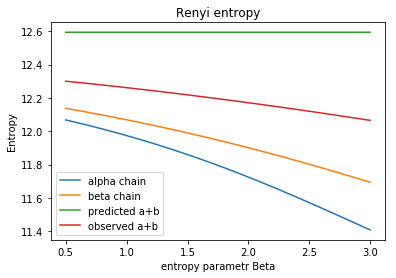

In [10]:
plt.plot(xes, y_alpha, label='alpha chain')
plt.plot(xes, y_beta, label='beta chain')
plt.plot(xes, y_a_b, label='predicted a+b')
plt.plot(xes, y_ab, label='observed a+b')
plt.title('Renyi entropy')
plt.xlabel('entropy parametr Beta')
plt.ylabel('Entropy')
plt.legend()

## Data preparation

### Aminoacid properties and kidera factors tables

In [4]:
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa2num_table = {aa[i]:i for i in range(20)}

def aa2num(aa):
    return aa2num_table[aa]

def protein2array(protein):
    return np.array([aa2num(aa) for aa in protein])

In [5]:
dict_aa_prop = {}
dict_aa_prop['A'] = [1.29, 0.9, 0, 0.049, 1.8, 0, 0, 0.047, 0.065, 0.78, 67, 1, 0, 0, 1, 1]
dict_aa_prop['C'] = [1.11, 0.74, 0, 0.02, 2.5, -2, 0, 0.015, 0.015, 0.8, 86, 1, 1, -1, 0, 1]
dict_aa_prop['D'] = [1.04, 0.72, -1, 0.051, -3.5, -2, 1, 0.071, 0.074, 1.41, 91, 1, 0, 1, 1,  1]
dict_aa_prop['E'] = [1.44, 0.75, -1, 0.051, -3.5, -2, 1, 0.094, 0.089, 1, 109, 1, 0, 1, 0, 1]
dict_aa_prop['F'] = [1.07, 1.32, 0, 0.051, 2.8, 0, 0, 0.021, 0.029, 0.58, 135, 1, 1, -1, 0, 1]
dict_aa_prop['G'] = [0.56, 0.92, 0, 0.06, -0.4, 0, 0, 0.071, 0.07, 1.64, 48, 1, 0, 1, 1, 1]
dict_aa_prop['H'] = [1.22, 1.08, 0, 0.034, -3.2, 1, 1, 0.022, 0.025, 0.69, 118, 1, 0, -1, 0, 1]
dict_aa_prop['I'] = [0.97, 1.45, 0, 0.047, 4.5, 0, 0, 0.032, 0.035, 0.51, 124, 1, 1, -1, 0, 1]
dict_aa_prop['K'] = [1.23, 0.77, 1, 0.05, -3.9, 2, 1, 0.105, 0.08, 0.96, 135, 1, 0, 1, 0, 1]
dict_aa_prop['L'] = [1.3, 1.02, 0, 0.078, 3.8, 0, 0, 0.052, 0.063, 0.59, 124, 1, 1, -1, 1, 1]
dict_aa_prop['M'] = [1.47, 0.97, 0, 0.027, 1.9, 0, 0, 0.017, 0.016, 0.39, 124, 1, 1, 1, 0, 1]
dict_aa_prop['N'] = [0.9, 0.76, 0, 0.058, -3.5, 0, 1, 0.062, 0.053, 1.28, 96, 1, 0, 1, 1, 1]
dict_aa_prop['P'] = [0.52, 0.64, 0, 0.051, -1.6, 0, 0, 0.052, 0.054, 1.91, 90, 1, 0, 1, 0, 1]
dict_aa_prop['Q'] = [1.27, 0.8, 0, 0.051, -3.5, 1, 1, 0.053, 0.051, 0.97, 114, 1, 0, 1, 0, 1]
dict_aa_prop['R'] = [0.96, 0.99, 1, 0.066, -4.5, 2, 1, 0.068, 0.059, 0.88, 148, 1, 0, 1, 1, 1]
dict_aa_prop['S'] = [0.82, 0.95, 0, 0.057, -0.8, -1, 1, 0.072, 0.071, 1.33, 73, 1, 0, 1, 1, 1]
dict_aa_prop['T'] = [0.82, 1.21, 0, 0.064, -0.7, -1, 0, 0.064, 0.065, 1.03, 93, 1, 0, 0, 1, 1]
dict_aa_prop['V'] = [0.91, 1.49, 0, 0.049, 4.2, 0, 0, 0.048, 0.048, 0.47, 105, 1, 1, -1, 0, 1]
dict_aa_prop['W'] = [0.99, 1.14, 0, 0.022, -0.9, 1, 1, 0.007, 0.012, 0.75, 163, 1, 1, -1, 0, 1]
dict_aa_prop['Y'] = [0.72, 1.25, 0, 0.07, -1.3, -1, 1, 0.032, 0.033, 1.05, 141, 1, 1, -1, 1, 1]

aa_prop = np.zeros((20, 16))
for i in range(20):
    aa_prop[i, :] = dict_aa_prop[aa[i]]

In [6]:
dict_kidera = {}
dict_kidera['A'] = [-1.56, -1.67, -0.97, -0.27, -0.93, -0.78, -0.2, -0.08, 0.21, -0.48]
dict_kidera['R'] = [0.22, 1.27, 1.37, 1.87, -1.7, 0.46, 0.92, -0.39, 0.23, 0.93]
dict_kidera['N'] = [1.14, -0.07, -0.12, 0.81, 0.18, 0.37, -0.09, 1.23, 1.1, -1.73]
dict_kidera['D'] = [0.58, -0.22, -1.58, 0.81, -0.92, 0.15, -1.52, 0.47, 0.76, 0.7]
dict_kidera['C'] = [0.12, -0.89, 0.45, -1.05, -0.71, 2.41, 1.52, -0.69, 1.13, 1.1]
dict_kidera['Q'] = [-0.47, 0.24, 0.07, 1.1, 1.1, 0.59, 0.84, -0.71, -0.03, -2.33]
dict_kidera['E'] = [-1.45, 0.19, -1.61, 1.17, -1.31, 0.4, 0.04, 0.38, -0.35, -0.12]
dict_kidera['G'] = [1.46, -1.96, -0.23, -0.16, 0.1, -0.11, 1.32, 2.36, -1.66, 0.46]
dict_kidera['H'] = [-0.41, 0.52, -0.28, 0.28, 1.61, 1.01, -1.85, 0.47, 1.13, 1.63]
dict_kidera['I'] = [-0.73, -0.16, 1.79, -0.77, -0.54, 0.03, -0.83, 0.51, 0.66, -1.78]
dict_kidera['L'] = [-1.04, 0, -0.24, -1.1, -0.55, -2.05, 0.96, -0.76, 0.45, 0.93]
dict_kidera['K'] = [-0.34, 0.82, -0.23, 1.7, 1.54, -1.62, 1.15, -0.08, -0.48, 0.6]
dict_kidera['M'] = [-1.4, 0.18, -0.42, -0.73, 2, 1.52, 0.26, 0.11, -1.27, 0.27]
dict_kidera['F'] = [-0.21, 0.98, -0.36, -1.43, 0.22, -0.81, 0.67, 1.1, 1.71, -0.44]
dict_kidera['P'] = [2.06, -0.33, -1.15, -0.75, 0.88, -0.45, 0.3, -2.3, 0.74, -0.28]
dict_kidera['S'] = [0.81, -1.08, 0.16, 0.42, -0.21, -0.43, -1.89, -1.15, -0.97, -0.23]
dict_kidera['T'] = [0.26, -0.7, 1.21, 0.63, -0.1, 0.21, 0.24, -1.15, -0.56, 0.19]
dict_kidera['W'] = [0.3, 2.1, -0.72, -1.57, -1.16, 0.57, -0.48, -0.4, -2.3, -0.6]
dict_kidera['Y'] = [1.38, 1.48, 0.8, -0.56, 0, -0.68, -0.31, 1.03, -0.05, 0.53]
dict_kidera['V'] = [-0.74, -0.71, 2.04, -0.4, 0.5, -0.81, -1.07, 0.06, -0.46, 0.65]

kidera = np.zeros((20, 10))
for i in range(20):
    kidera[i, :] = dict_kidera[aa[i]]

In [7]:
def letters(protein):
    counter = np.zeros((20,), dtype = int)
    for l in protein:
        counter[aa2num[l]] += 1
    return counter

def shift_prop(protein, dictionary):
    prop = prop_array(protein, dictionary)
    return np.array([np.dot(prop[:, i], np.linspace(-1., 1., prop.shape[0])) for i in range(10)], dtype='float')

In [8]:
alpha_letters = np.zeros((n_samples, 20))
alpha_mean_kidera = np.zeros((n_samples, 10))
alpha_std_kidera = np.zeros((n_samples, 10))
alpha_shift_kidera = np.zeros((n_samples, 10))

for i in range(n_samples):
    array = protein2array(data[i, 0])
    for aa in array:
        alpha_letters[i, aa] += 1
    properties = kidera[array, :]
    alpha_mean_kidera[i, :] = np.mean(properties, axis=0)
    alpha_std_kidera[i, :] = np.std(properties, axis=0)
    alpha_shift_kidera[i, :] = np.dot(properties.T, np.linspace(-1., 1., properties.shape[0]))

In [9]:
beta_letters = np.zeros((n_samples, 20))
beta_mean_kidera = np.zeros((n_samples, 10))
beta_std_kidera = np.zeros((n_samples, 10))
beta_shift_kidera = np.zeros((n_samples, 10))

for i in range(n_samples):
    array = protein2array(data[i, 1])
    for aa in array:
        beta_letters[i, aa] += 1
    properties = kidera[array, :]
    beta_mean_kidera[i, :] = np.mean(properties, axis=0)
    beta_std_kidera[i, :] = np.std(properties, axis=0)
    beta_shift_kidera[i, :] = np.dot(properties.T, np.linspace(-1., 1., properties.shape[0]))

In [10]:
alpha_length = np.array([len(protein) for protein in data[:, 0]])
beta_length = np.array([len(protein) for protein in data[:, 1]])

## PCA Analysis

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [75]:
pca = PCA()
pca.fit(alpha_mean_kidera)
pca_alpha_sum_explained_ratio = [sum(pca.explained_variance_ratio_[:i]) for i in range(10)]
pca.fit(beta_mean_kidera)
pca_beta_sum_explained_ratio = [sum(pca.explained_variance_ratio_[:i]) for i in range(10)]
pca_coordinates = pca.fit_transform(np.concatenate([alpha_mean_kidera, beta_mean_kidera], axis=1))
pca_alphabeta_sum_explained_ratio = [sum(pca.explained_variance_ratio_[:i]) for i in range(20)]

indexes = np.random.choice(n_samples, 1000, replace=False)

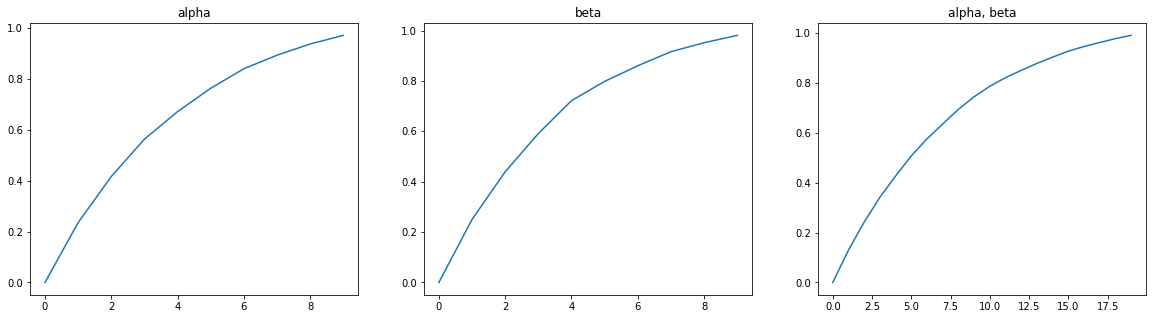

In [62]:
plt.figure(1, figsize=(20, 5))
plt.title('pca explained ratio of kidera factor')

plt.subplot(131)
plt.title('alpha')
plt.plot(pca_alpha_sum_explained_ratio)

plt.subplot(132)
plt.title('beta')
plt.plot(pca_beta_sum_explained_ratio)

plt.subplot(133)
plt.title('alpha, beta')
plt.plot(pca_alphabeta_sum_explained_ratio)

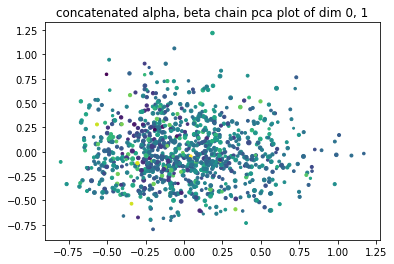

In [76]:
step = 100
plt.title('concatenated alpha, beta chain pca plot of dim 0, 1')
plt.scatter(pca_coordinates[indexes, 0], 
            pca_coordinates[indexes, 1], 
            c=pca_coordinates[indexes, 2],
            s=10*(pca_coordinates[indexes, 3] + 1))

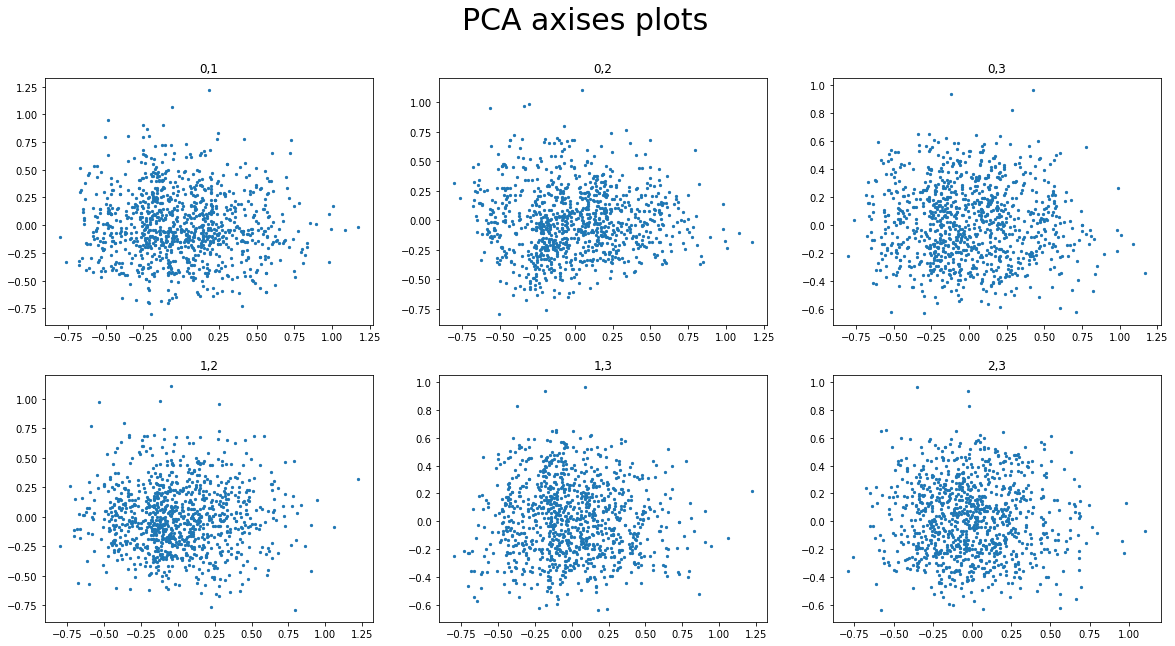

In [77]:
fig = plt.figure(1, figsize=(20, 10))
st = fig.suptitle("PCA axises plots", fontsize=30)

order = np.array([[0, 1, 2, 3], [0, 0, 4, 5], [0, 0, 0, 6]])
for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(230 + order[i, j])
        plt.title(str(i) + ',' + str(j))
        plt.scatter(pca_coordinates[indexes, i], 
                    pca_coordinates[indexes, j],
                    s=5)

There is a clear division in data by line 0-axis = -0.33
And not so clear division by line 1-axis = -0.27

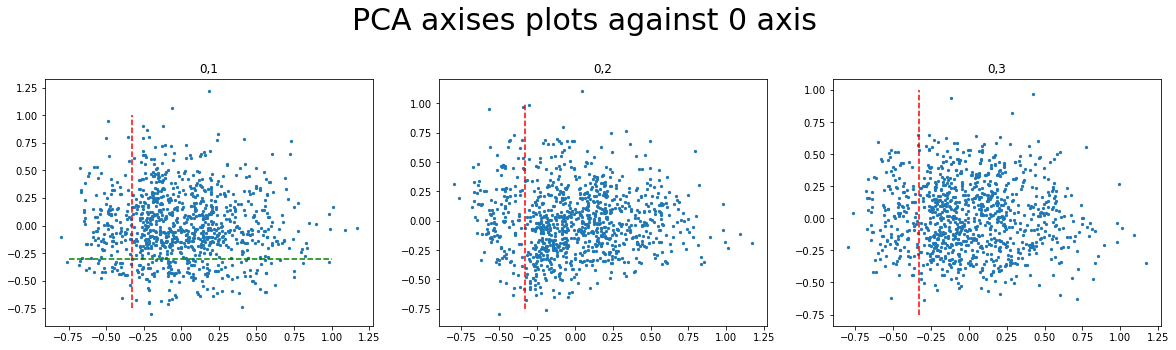

In [78]:
fig = plt.figure(1, figsize=(20, 10))
st = fig.suptitle("PCA axises plots against 0 axis", fontsize=30)

for j in range(1, 4):
    plt.subplot(230 + j)
    plt.title(str(0) + ',' + str(j))
    plt.plot([-0.33, -0.33], [-0.75, 1.], '--', color='r')
    if j == 1:
        plt.plot([-0.75, 1.], [-0.3, -0.3], '--', color='g')
    plt.scatter(pca_coordinates[indexes, 0], 
                pca_coordinates[indexes, j],
                s=5)

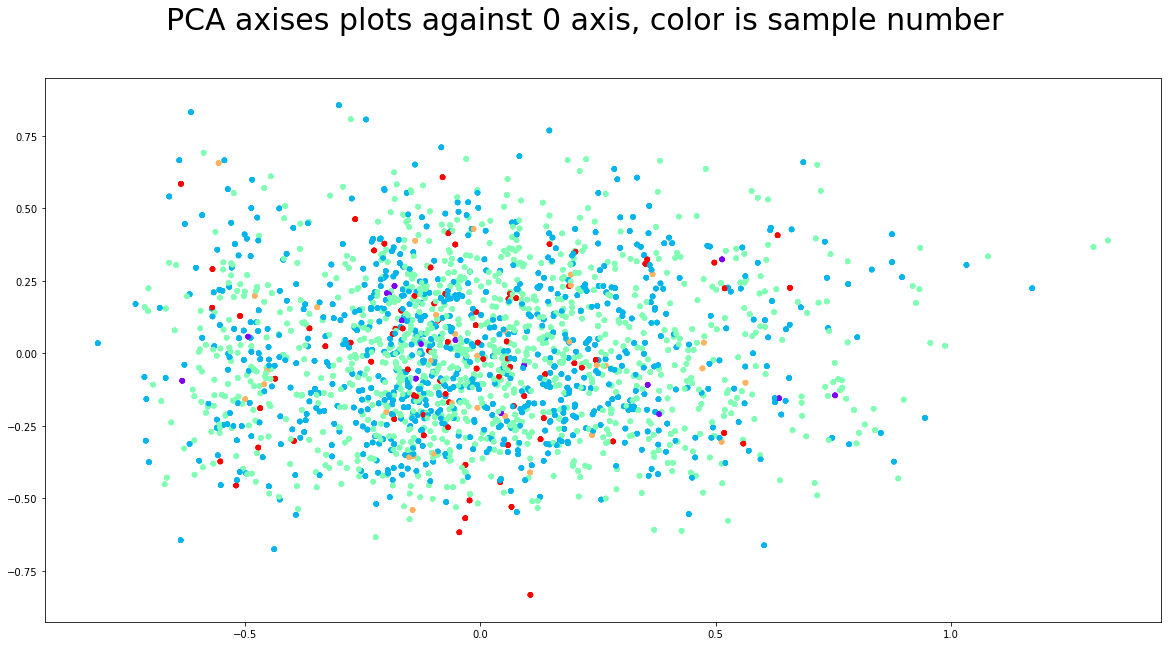

In [104]:
fig = plt.figure(1, figsize=(20, 10))
st = fig.suptitle("PCA axises plots against 0 axis, color is sample number", fontsize=30)

indexes = np.random.choice(n_samples, 2000, replace=False)
sampling = np.array(data[indexes, 8], dtype=int)
colors = np.array(cm.rainbow(np.linspace(0, 1, 5)))

plt.subplot(111)
for i in range(1, 6):
    plt.scatter(pca_coordinates[indexes, 0], 
                pca_coordinates[indexes, j],
                s=20, c=colors[sampling - 1])

As we can see the division is sample independent

# Alpha -> Beta regressions

In [11]:
from sklearn.model_selection import ShuffleSplit
from scipy import spatial
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

In [26]:
def A2BScoreTable(clf, X_test, Y_test, n_distance_testing=50):
    y_pred = clf.predict(X_test)
    print('r2 =', sklearn.metrics.r2_score(Y_test, y_pred))
    
    KDtree = spatial.KDTree(Y_test)
    table = np.zeros((n_distance_testing, 2))
    for i in range(n_distance_testing):
        table[i, 0] = KDtree.query(y_pred[i])[0]
        table[i, 1] = np.linalg.norm(Y_test[i, :] - y_pred[i, :])
    plt.scatter(table[:, 0], table[:, 1])
    plt.plot([0, 1], [0, 1], c='r')
    plt.xlabel('distance from predicted to closest')
    plt.ylabel('distance from predicted to paired')
    
    plt.show()
    print('mean distance from predicted to paired: ', np.mean(table[:, 0], axis=0))
    print('mean distance from predicted to closest: ', np.mean(table[:, 1], axis=0))
    
    positions = []
    for i in range(n_distance_testing):
        distances = np.linalg.norm(Y_test - y_pred[i], axis = 1)
        pos = np.sum(distances < np.linalg.norm(Y_test[i] - y_pred[i]))
        positions.append(pos)
    print('samples in test =', Y_test.shape[0])
    print('number of betas closer to prediction than paired beta:')
    for pos in positions:
        print(pos, end=' ')
    print('\nmean:', np.mean(positions))
    print('accuracy of binary prediction:', 1. - np.mean(positions) / Y_test.shape[0])
    return y_pred

In [28]:
rs = ShuffleSplit(n_splits = 1, test_size = 0.33)
train_index, test_index = next(rs.split(alpha_mean_kidera))

def GetRegressionDataSplit(alpha, beta, train_index=train_index, test_index=test_index):
    X_train, y_train = alpha[train_index], beta[train_index]
    X_test, y_test = alpha[test_index], beta[test_index]
    return X_train, y_train, X_test, y_test

X_train, Y_train, X_test, Y_test = GetRegressionDataSplit(alpha_mean_kidera, beta_mean_kidera)

### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

r2 = 0.000602424309548


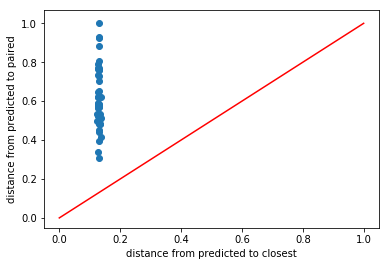

mean distance from predicted to paired:  0.12946808023
mean distance from predicted to closest:  0.605316500064
samples in test = 97263
number of betas closer to prediction than paired beta:
79818 31939 51382 38348 47610 88330 80741 49967 84629 17936 47754 3774 93144 25837 49777 94633 60024 33833 84935 29412 38242 75908 2031 94508 35018 35554 83500 60207 45388 37659 66415 35109 86777 83624 26065 84359 12588 96106 31486 26060 33282 46932 9794 59245 47847 65482 19247 51115 27724 52118 
mean: 51264.26
accuracy of binary prediction: 0.527068463856


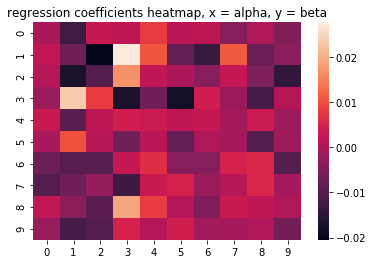

In [54]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
y_pred = A2BScoreTable(clf, X_test, Y_test)
plt.title('regression coefficients heatmap, x = alpha, y = beta')
plt.xlabel('alpha kidera factors')
plt.ylabel('beta kidera factors')
sns.heatmap(clf.coef_)

### Ridge

r2 = 0.000594499766843


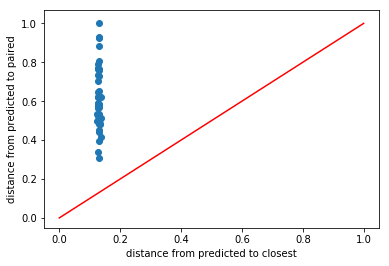

mean distance from predicted to paired:  0.129387726726
mean distance from predicted to closest:  0.605306047437
samples in test = 97263
number of betas closer to prediction than paired beta:
79813 31827 51473 38208 47537 88331 80697 50011 84588 17948 47775 3788 93145 25897 49850 94638 59981 33873 84895 29376 38192 75897 2021 94506 35068 35469 83450 60265 45327 37601 66481 35229 86741 83620 26168 84366 12560 96110 31557 25980 33309 46810 9884 59194 47900 65398 19305 51128 27928 52275 
mean: 51267.8
accuracy of binary prediction: 0.527104860019


In [55]:
from sklearn.linear_model import Ridge

parameters = {'alpha':2**np.linspace(0, 10, 10)}
clf = GridSearchCV(Ridge(), parameters)
clf.fit(X_train, Y_train)
y_pred = A2BScoreTable(clf, X_test, Y_test)

### Decision Tree

r2 = 0.000204478626828


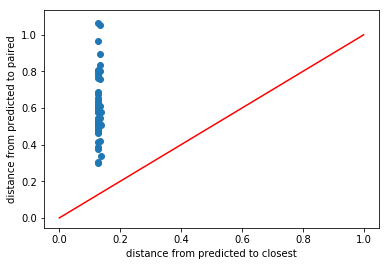

mean distance from predicted to paired:  0.129665256672
mean distance from predicted to closest:  0.600945863218
samples in test = 96650
number of betas closer to prediction than paired beta:
96100 31806 52580 1819 22630 57171 13037 48826 33272 66248 72902 49728 93009 28637 96020 86991 3665 83835 94947 38940 59360 35040 41055 51186 1579 85558 36916 26230 29378 57759 30255 87368 8295 40690 63832 54684 38461 71003 89946 8480 83163 7480 87640 87509 32769 22833 48563 61110 26816 13664 
mean: 49215.7


In [32]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':2**np.linspace(0, 7, 10)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters)
clf.fit(X_train, Y_train)
y_pred = A2BScoreTable(clf, X_test, Y_test)

## Random Forest

Feature selection is planned to be perfomed here.

{'n_estimators': 9}


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


r2 = 0.0317653461696


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


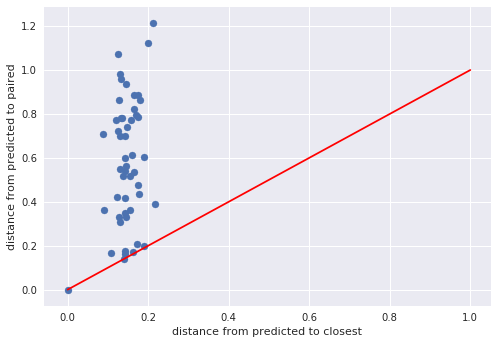

mean distance from predicted to paired:  0.146330706341
mean distance from predicted to closest:  0.586539837286
samples in test = 97263
number of betas closer to prediction than paired beta:
4840 25707 16208 3 90710 2 83674 10252 1 82950 51796 50720 94023 81356 9 11910 29075 78705 90116 847 3626 36152 4344 0 84580 74184 19 82755 82370 31821 0 69763 28681 2751 23250 95900 50968 65399 91114 34415 82962 4992 1424 67519 90246 48386 16 72654 273 9829 
mean: 40865.94
accuracy of binary prediction: 0.579840843897


In [29]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators':np.arange(1, 10)}
clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(X_train, Y_train)
print(clf.best_params_)
y_pred = A2BScoreTable(clf, X_test, Y_test)

{'n_estimators': 60}


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


r2 = 0.0929373749729


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


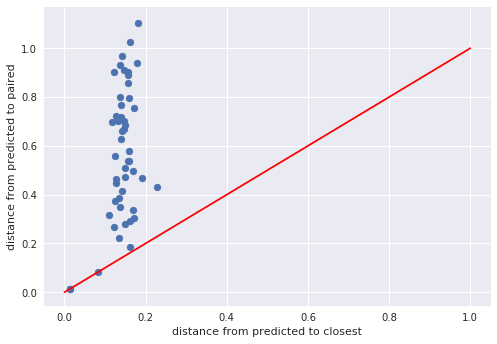

mean distance from predicted to paired:  0.141428411409
mean distance from predicted to closest:  0.575778429493
samples in test = 97263
number of betas closer to prediction than paired beta:
4602 24947 28528 80 89446 883 93127 20217 0 78516 50763 44469 93598 84110 259 5898 32527 60245 92927 813 6930 32672 3977 1 95270 78194 388 86904 34859 16911 0 70311 74178 6750 21674 94704 52754 67642 82854 21349 81622 3046 97 70979 87929 44580 1 70307 1542 12857 
mean: 40544.74
accuracy of binary prediction: 0.583143230211


In [30]:
parameters = {'n_estimators':[30, 40, 50, 60]}
clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(X_train, Y_train)
print(clf.best_params_)
y_pred = A2BScoreTable(clf, X_test, Y_test)

{'n_estimators': 100}


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


r2 = 0.0967585225199


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


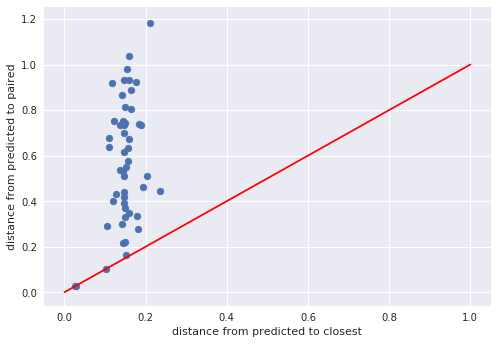

mean distance from predicted to paired:  0.147149051724
mean distance from predicted to closest:  0.572493958594
samples in test = 97263
number of betas closer to prediction than paired beta:
4936 25901 27688 104 89339 2021 88040 14244 0 79904 49674 43640 95592 84774 48 7916 31415 57244 93941 274 4004 34690 2802 2 91984 79734 587 81898 40044 16096 0 70701 82092 6406 21554 95210 48356 62542 81121 12821 87650 3684 74 60899 87430 44636 1 69886 1586 9115 
mean: 39886.0
accuracy of binary prediction: 0.589916000946


In [31]:
parameters = {'n_estimators':[60, 75, 100]}
clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(X_train, Y_train)
print(clf.best_params_)
y_pred = A2BScoreTable(clf, X_test, Y_test)

/home/CyberslavB/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


r2 = 0.100808197988


/home/CyberslavB/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


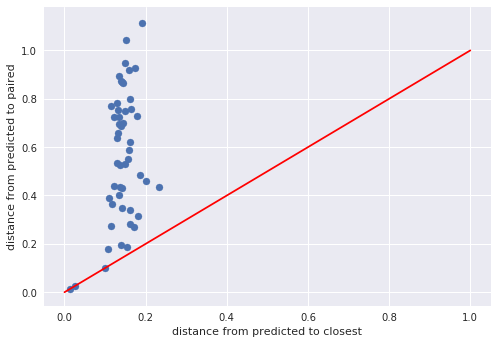

mean distance from predicted to paired:  0.141732555305
mean distance from predicted to closest:  0.566793594789
samples in test = 97263
number of betas closer to prediction than paired beta:
4928 24642 26333 78 90245 1171 91845 14957 0 78944 53218 46107 91890 84075 18 7755 36542 58680 92214 158 3741 35049 3789 7 93223 74252 297 85734 37834 16519 0 70680 81368 6001 21530 95418 48026 62809 82420 16578 64931 3220 23 69487 88200 49397 4 74260 1698 10753 
mean: 40020.96
accuracy of binary prediction: 0.588528422936


In [32]:
clf = RandomForestRegressor(n_estimators=250)
clf.fit(X_train, Y_train)
y_pred = A2BScoreTable(clf, X_test, Y_test)

In [33]:
clf.feature_importances_

array([ 0.10028611,  0.09965987,  0.10229078,  0.10027399,  0.09977618,
        0.09927082,  0.10060592,  0.09890549,  0.09880643,  0.10012442])

## Small train/test size methods.

In [24]:
relative_size = 0.1
rs_small = ShuffleSplit(n_splits = 2, test_size = relative_size)
train_index_too_big, train_small_index = next(rs_small.split(alpha_mean_kidera))
train_index_too_big, test_small_index = next(rs_small.split(alpha_mean_kidera))

X_train, Y_train, X_test, Y_test = GetRegressionDataSplit(alpha_mean_kidera, beta_mean_kidera,
                                                         train_small_index, test_small_index)

/home/CyberslavB/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


r2 = -0.0012445305793


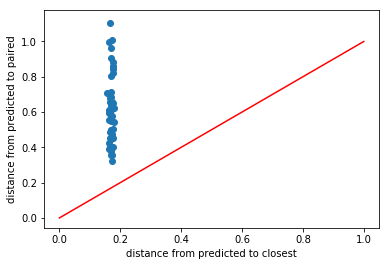

mean distance from predicted to paired:  0.169971999832
mean distance from predicted to closest:  0.619746013462
samples in test = 8787
number of betas closer to prediction than paired beta:
6642 5176 8613 242 675 473 3931 8228 2825 5861 465 2297 8663 962 5438 6923 6173 1838 7901 2480 8451 2700 3862 8759 1827 4454 859 8683 838 6093 8036 1718 4849 5854 3696 2764 6113 8196 1374 5308 6498 1025 8282 4518 2504 8378 4864 5987 6102 7007 
mean: 4708.1


In [29]:
from sklearn import svm

parameters = {'estimator__kernel':('linear', 'rbf'), 'estimator__C':2**np.linspace(-5, 5, 10)}
clf = GridSearchCV(MultiOutputRegressor(svm.SVR()), parameters)
clf.fit(X_train, Y_train)
y_pred = A2BScoreTable(clf, X_test, Y_test)

### KNN

/home/CyberslavB/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


r2 = -0.0615656883887


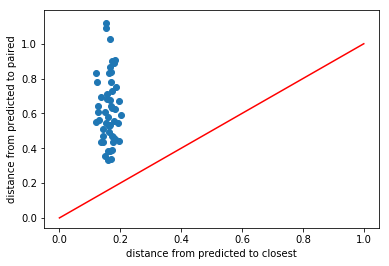

mean distance from predicted to paired:  0.161620575118
mean distance from predicted to closest:  0.626848516742
samples in test = 8787
number of betas closer to prediction than paired beta:
5673 4215 7832 270 1280 273 3570 8109 3475 4662 613 3264 8699 1671 6673 6338 6246 1379 8183 662 8715 2514 1427 8760 2500 3323 310 8337 1946 6224 7612 758 4412 7002 4965 3334 5232 8291 1850 3370 7493 1198 7828 3850 1879 8314 4206 4577 6824 6443 
mean: 4531.62


In [30]:
from sklearn.neighbors import KNeighborsRegressor

parameters = {'n_neighbors':[3, 5, 8, 10, 15]}
clf = GridSearchCV(KNeighborsRegressor(), parameters)
clf.fit(X_train, Y_train)
y_pred = A2BScoreTable(clf, X_test, Y_test)

## Alpha+Beta -> {0, 1} prediction

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

In [12]:
rs = ShuffleSplit(n_splits = 1, test_size = 0.33)
train_index, test_index = next(rs.split(alpha_mean_kidera))

def GetShufflingDataSplit(alpha, beta, train_index=train_index, test_index=test_index):
    A_train, A_test = alpha[train_index], alpha[test_index]
    B_train, B_test = beta[train_index], beta[test_index]
    Bp_train, Bp_test = np.random.permutation(B_train), np.random.permutation(B_test)
    
    Xn_train = np.concatenate([A_train, B_train], axis = 1)
    Xp_train = np.concatenate([A_train, Bp_train], axis = 1)
    Xn_test = np.concatenate([A_test, B_test], axis = 1)
    Xp_test = np.concatenate([A_test, Bp_test], axis = 1)

    X_train = np.concatenate([Xn_train, Xp_train], axis = 0)
    X_test = np.concatenate([Xn_test, Xp_test], axis = 0)
    y_train, y_test = np.zeros((2 * len(train_index), 2)), np.zeros((2 * len(test_index), 2))
    for i in range(len(train_index)):
        y_train[i, 1] = 1
        y_train[i + len(train_index), 0] = 1
    for i in range(len(test_index)):
        y_test[i, 1] = 1
        y_test[i + len(test_index), 0] = 1
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = GetShufflingDataSplit(alpha_mean_kidera, beta_mean_kidera)

### EM-clustering

In [58]:
from sklearn.mixture import GaussianMixture

In [59]:
means = np.mean(X_train, axis=0)
means_init = np.array([means, means])
precisions_init = np.array([np.linalg.inv(np.cov(X_train[y_train[:, 1] == 1].T)), 
                            np.linalg.inv(np.cov(X_train[y_train[:, 1] == 0].T))])
EMcluster = GaussianMixture(n_components=2, precisions_init=precisions_init, means_init=means_init)
EMcluster.fit(X_train)
EMcluster.score(X_test, y_test)

6.1689553129444326

In [60]:
y_pred = EMcluster.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

0.4806071548125056

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
parameters = {'C':2**np.linspace(-4, 5, 10)}
clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(X_train, y_train[:, 1])
print(clf.best_params_)

{'C': 0.0625}


In [63]:
y_pred = clf.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

0.50008912488103319

## RandomForest 

In [121]:
relative_size = 0.03
rs_small = ShuffleSplit(n_splits = 2, test_size = relative_size)
train_index_too_big, train_small_index = next(rs_small.split(alpha_mean_kidera))
train_index_too_big, test_small_index = next(rs_small.split(alpha_mean_kidera))

X_train, Y_train, X_test, Y_test = GetShufflingDataSplit(alpha_mean_kidera, beta_mean_kidera)

In [123]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[1,3,5,8,9,10]}
clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, Y_train[:, 1])
print(clf.best_params_)

{'n_estimators': 10}


In [125]:
y_pred = clf.predict_proba(X_test)
roc_auc_score(Y_test, y_pred)

0.63861053591607297

In [ ]:
# Looks like this also should be trained on small data set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[10,11,15,20,25,50]}
clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, Y_train[:, 1])
print(clf.best_params_)

In [ ]:
y_pred = clf.predict_proba(X_test)
roc_auc_score(Y_test, y_pred)

## Bayes Network

### Creation of table for R bnlearn. kidera factors and length

In [13]:
n_features = 28
n_bines = 10
n_clusters = 10

In [14]:
def QuantileBins(array, n_bines=n_bines):
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(array.shape[0])
    return ranks * n_bines // array.shape[0]

def MinMaxBins(array, n_bines=n_bines):
    min_, max_ = min(array), max(array)
    return (array - min_) * n_bines // (max_ - min_)

In [80]:
alpha_mean_kidera_classes = np.zeros((n_samples, 10), dtype=int)
beta_mean_kidera_classes = np.zeros((n_samples, 10), dtype=int)

for i in range(10):
    alpha_mean_kidera_classes[:, i] = QuantileBins(alpha_mean_kidera[:, i])
    beta_mean_kidera_classes[:, i] = QuantileBins(beta_mean_kidera[:, i])
    # alpha_mean_kidera_classes[:, i] = MinMaxBins(alpha_mean_kidera[:, i])
    # beta_mean_kidera_classes[:, i] = MinMaxBins(beta_mean_kidera[:, i])

alpha_length_bin = MinMaxBins(alpha_length)
beta_length_bin = MinMaxBins(beta_length)

### V segments clusterization

In [81]:
alpha_V = data[:, 2]
beta_V = data[:, 3]

In [82]:
A_set = set()
B_set = set()
for i in range(n_samples):
    for segment in alpha_V[i].split(','):
        A_set.add(segment)
    for segment in beta_V[i].split(','):
        B_set.add(segment)
n_A, n_B = len(A_set), len(B_set)
print(n_A, n_B)

48 61


In [83]:
A_list = list(A_set)
B_list = list(B_set)
anti_list_A = {i:0 for i in A_list}
for i in range(n_A):
    anti_list_A[A_list[i]] = i
anti_list_B = {i:0 for i in B_list}
for i in range(n_B):
    anti_list_B[B_list[i]] = i

In [84]:
meet_matrix = np.zeros((n_A, n_B))
for i in range(n_samples):
    for A_segment in alpha_V[i].split(','):
        for B_segment in beta_V[i].split(','):
            meet_matrix[anti_list_A[A_segment], anti_list_B[B_segment]] += 1

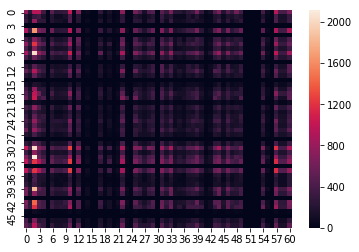

In [85]:
sns.heatmap(meet_matrix)

In [86]:
def get_score_matrix(matrix):
    score_matrix = np.zeros(matrix.shape)
    n_meetings = np.sum(matrix)
    pA = np.sum(matrix, axis = 1)
    pB = np.sum(matrix, axis = 0)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            score_matrix[i, j] = matrix[i, j] * n_meetings / (pA[i] * pB[j])
    return score_matrix

score_matrix = get_score_matrix(meet_matrix)

/Users/vlad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


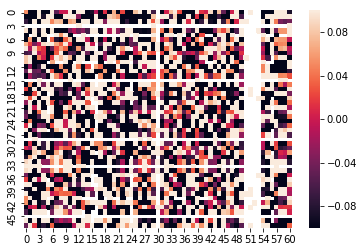

In [87]:
sns.heatmap(np.log(score_matrix))

In [88]:
pd_seq_data = pd.read_table('misc/251117.cdr12.txt')
pd_seq_data.head()

,species,gene,seqnt,seqaa,cdr1nt,cdr2nt,cdr2.5nt,cdr1aa,cdr2aa,cdr2.5aa
0,HomoSapiens,TRAV1-1*01,GGACAAAGCCTTGAGCAGCCCTCTGAAGTGACAGCTGTGGAAGGAG...,GQSLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFL...,ACATCTGGGTTTTATGGG,AATGCTCTGGATGGTTTG,AGTCGCTCTGATAGT,TSGFYG,NALDGL,SRSDS
1,HomoSapiens,TRAV1-2*01,GGACAAAACATTGACCAGCCCACTGAGATGACAGCTACGGAAGGTG...,GQNIDQPTEMTATEGAIVQINCTYQTSGFNGLFWYQQHAGEAPTFL...,ACATCTGGGTTCAACGGG,AATGTTCTGGATGGTTTG,AGTCGGTCTAAAGGG,TSGFNG,NVLDGL,SRSKG
2,HomoSapiens,TRAV10*01,AAAAACCAAGTGGAGCAGAGTCCTCAGTCCCTGATCATCCTGGAGG...,KNQVEQSPQSLIILEGKNCTLQCNYTVSPFSNLRWYKQDTGRGPVS...,GTGAGCCCCTTCAGCAAC,ATGACTTTCAGTGAGAACACA,GATGCAGACACAAAG,VSPFSN,MTFSENT,DADTK
3,HomoSapiens,TRAV12-1*01,CGGAAGGAGGTGGAGCAGGATCCTGGACCCTTCAATGTTCCAGAGG...,RKEVEQDPGPFNVPEGATVAFNCTYSNSASQSFFWYRQDCRKEPKL...,AACAGTGCTTCTCAGTCT,GTATACTCCAGTGGTAA,AATAGAGCCAGCCAG,NSASQS,VYSSG,NRASQ
4,HomoSapiens,TRAV12-2*01,CAGAAGGAGGTGGAGCAGAATTCTGGACCCCTCAGTGTTCCAGAGG...,QKEVEQNSGPLSVPEGAIASLNCTYSDRGSQSFFWYRQYSGKSPEL...,GACCGAGGTTCCCAGTCC,ATATACTCCAATGGTGAC,AATAAAGCCAGCCAG,DRGSQS,IYSNGD,NKASQ


In [89]:
seq_data = pd_seq_data.as_matrix()
for i in sorted(seq_data[:, 1]):
    print(i, end = ' ')

TRAV1*01 TRAV1-1*01 TRAV1-2*01 TRAV10*01 TRAV10*01 TRAV10D*01 TRAV10N*01 TRAV11*01 TRAV11D*01 TRAV12-1*01 TRAV12-1*01 TRAV12-2*01 TRAV12-2*01 TRAV12-3*01 TRAV12-3*01 TRAV12D-1*01 TRAV12D-2*01 TRAV12N-1*01 TRAV12N-2*01 TRAV12N-3*01 TRAV13-1*01 TRAV13-1*01 TRAV13-2*01 TRAV13-2*01 TRAV13-3*01 TRAV13-4/DV7*01 TRAV13-5*01 TRAV13D-1*01 TRAV13D-2*01 TRAV13D-3*01 TRAV13D-4*01 TRAV13N-1*01 TRAV13N-2*01 TRAV13N-3*01 TRAV13N-4*01 TRAV14-1*01 TRAV14-2*01 TRAV14-3*01 TRAV14/DV4*01 TRAV14D-1*01 TRAV14D-2*01 TRAV14D-3/DV8*01 TRAV14N-1*01 TRAV14N-2*01 TRAV14N-3*01 TRAV15-1/DV6-1*01 TRAV15-2/DV6-2*01 TRAV15D-1/DV6D-1*01 TRAV15D-2/DV6D-2*01 TRAV15N-1*01 TRAV15N-2*01 TRAV16*01 TRAV16*01 TRAV16D/DV11*01 TRAV16N*01 TRAV17*01 TRAV17*01 TRAV18*01 TRAV19*01 TRAV19*01 TRAV2*01 TRAV2*01 TRAV20*01 TRAV21*01 TRAV21/DV12*01 TRAV22*01 TRAV23/DV6*01 TRAV24*01 TRAV25*01 TRAV26-1*01 TRAV26-2*01 TRAV27*01 TRAV29/DV5*01 TRAV3*01 TRAV3-1*01 TRAV3-3*01 TRAV3-4*01 TRAV30*01 TRAV34*01 TRAV35*01 TRAV36/DV7*01 TRAV38-1*01 TRA

In [90]:
def cut_segment_name(name):
    if len(name) < 6:
        return name
    if name[5] >= '0' and name[5] <= '9':
        return name[:6]
    return name[:5]

In [91]:
dict_seqaa_data = {cut_segment_name(seq_data[i, 1]):seq_data[i, 3] for i in range(seq_data.shape[0])}

In [92]:
for i in sorted(dict_seqaa_data.keys()):
    print(i, end=' ')

TRAV1 TRAV10 TRAV11 TRAV12 TRAV13 TRAV14 TRAV15 TRAV16 TRAV17 TRAV18 TRAV19 TRAV2 TRAV20 TRAV21 TRAV22 TRAV23 TRAV24 TRAV25 TRAV26 TRAV27 TRAV29 TRAV3 TRAV30 TRAV34 TRAV35 TRAV36 TRAV38 TRAV39 TRAV4 TRAV40 TRAV41 TRAV5 TRAV6 TRAV7 TRAV8 TRAV9 TRBV1 TRBV10 TRBV11 TRBV12 TRBV13 TRBV14 TRBV15 TRBV16 TRBV17 TRBV18 TRBV19 TRBV2 TRBV20 TRBV21 TRBV23 TRBV24 TRBV25 TRBV26 TRBV27 TRBV28 TRBV29 TRBV3 TRBV30 TRBV31 TRBV4 TRBV5 TRBV6 TRBV7 TRBV9 TRDV1 TRDV2 TRDV3 TRDV4 TRDV5 TRGV1 TRGV2 TRGV3 TRGV4 TRGV5 TRGV6 TRGV7 TRGV8 TRGV9 

In [93]:
# Should print nothing if sequence is provided for all V segments
for i in A_list:
    if not cut_segment_name(i) in dict_seqaa_data.keys():
        print('Segment without sequence: ', i)

In [94]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist

matrix = matlist.blosum62
gap_open = -10
gap_extend = -0.5

def seg_distance(segment1, segment2):
    seq1, seq2 = dict_seqaa_data[segment1], dict_seqaa_data[segment2]
    return pairwise2.align.globalds(seq1, seq2, matrix, gap_open, gap_extend)[0][2]

In [95]:
A_distance_matrix = np.zeros((n_A, n_A))
for i in range(n_A):
    for j in range(n_A):
        A_distance_matrix[i, j] = seg_distance(cut_segment_name(A_list[i]), 
                                               cut_segment_name(A_list[j]))
B_distance_matrix = np.zeros((n_B, n_B))
for i in range(n_B):
    for j in range(n_B):
        B_distance_matrix[i, j] = seg_distance(cut_segment_name(B_list[i]), 
                                               cut_segment_name(B_list[j]))

#### Clustering itself. 
Several algorythms are tried.

In [96]:
def factor_matrix(x_clustering, y_clustering, matrix):
    new_matrix = np.zeros((max(x_clustering) + 1, max(y_clustering) + 1))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            new_matrix[x_clustering[i], y_clustering[j]] += matrix[i, j]
    return new_matrix

#### Agglomerative clustering with linkage=average

In [97]:
from sklearn.cluster import AgglomerativeClustering

agg_cls_average = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
A_aggclusters_average = agg_cls_average.fit_predict(A_distance_matrix)
B_aggclusters_average = agg_cls_average.fit_predict(B_distance_matrix)

In [98]:
print('Size of Alpha clusters')
print([sum(A_aggclusters_average == i)for i in range(10)])
print('Size of Alpha clusters')
print([sum(B_aggclusters_average == i) for i in range(10)])

Size of Alpha clusters
[4, 34, 2, 2, 1, 1, 1, 1, 1, 1]
Size of Alpha clusters
[44, 3, 3, 1, 3, 1, 3, 1, 1, 1]


Clusterization of beta segments is awful. 

It cannot be used.

#### Agglomerative clustering with linkage=complete

In [99]:
agg_cls_complete = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
A_aggclusters_complete = agg_cls_complete.fit_predict(A_distance_matrix)
B_aggclusters_complete = agg_cls_complete.fit_predict(B_distance_matrix)

In [100]:
print('Size of Alpha clusters')
print([sum(A_aggclusters_complete == i) for i in range(10)])
print('Size of Alpha clusters')
print([sum(B_aggclusters_complete == i) for i in range(10)])

Size of Alpha clusters
[9, 7, 7, 4, 2, 5, 3, 5, 3, 3]
Size of Alpha clusters
[9, 9, 14, 3, 3, 6, 7, 3, 3, 4]


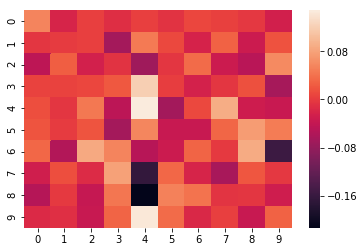

In [101]:
factorized_meet_matrix = factor_matrix(A_aggclusters_complete, B_aggclusters_complete, meet_matrix)
factorized_score_matrix = get_score_matrix(factorized_meet_matrix)

sns.heatmap(np.log(factorized_score_matrix))

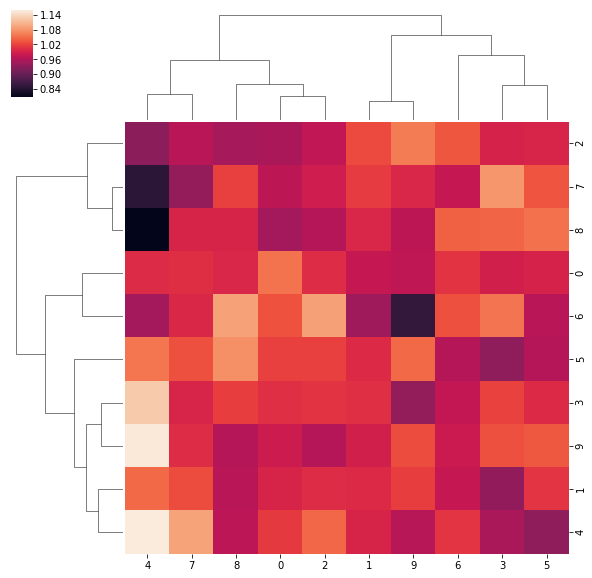

In [102]:
# this method doens't work with log(0) =(((
sns.clustermap(factorized_score_matrix, metric="correlation")

In [103]:
# pd_spec_alpha_clusters = pd.DataFrame(np.array([A_list, A_aggclusters]).T, columns=['segment', 'cluster'])
# pd_spec_beta_clusters = pd.DataFrame(np.array([B_list, B_clusters]).T, columns=['segment', 'cluster'])

#### Spectral clustering

In [104]:
from sklearn.cluster import SpectralClustering

spec_cls = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
A_specclusters = spec_cls.fit_predict(A_distance_matrix)
B_specclusters = spec_cls.fit_predict(B_distance_matrix)

In [105]:
print('Size of Alpha clusters')
print([sum(A_specclusters == i) for i in range(10)])
print('Size of Alpha clusters')
print([sum(B_specclusters == i) for i in range(10)])

Size of Alpha clusters
[6, 4, 3, 8, 4, 6, 4, 2, 3, 8]
Size of Alpha clusters
[9, 8, 9, 10, 3, 5, 3, 5, 2, 7]


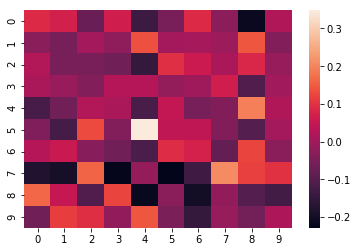

In [106]:
factorized_meet_matrix = factor_matrix(A_specclusters, B_specclusters, meet_matrix)
factorized_score_matrix = get_score_matrix(factorized_meet_matrix)

sns.heatmap(np.log(factorized_score_matrix))

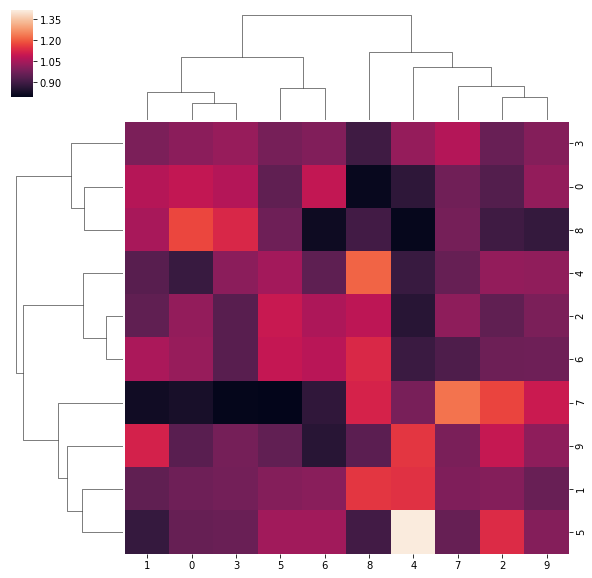

In [107]:
sns.clustermap(factorized_score_matrix, metric="correlation")

In [108]:
pd_alpha_clusters = pd.DataFrame(np.array([A_list, A_aggclusters_complete, A_specclusters]).T, 
                                 columns=['segment', 'agglomerative cluster', 'spectral cluster'])
pd_beta_clusters = pd.DataFrame(np.array([B_list, B_aggclusters_complete, B_specclusters]).T, 
                                 columns=['segment', 'agglomerative cluster', 'spectral cluster'])

In [109]:
dict_agg_alpha_clusters = {pd_alpha_clusters.iloc[i, 0]:pd_alpha_clusters.iloc[i, 1] for i in range(n_A)}
dict_agg_beta_clusters = {pd_beta_clusters.iloc[i, 0]:pd_beta_clusters.iloc[i, 1] for i in range(n_B)}
dict_spec_alpha_clusters = {pd_alpha_clusters.iloc[i, 0]:pd_alpha_clusters.iloc[i, 2] for i in range(n_A)}
dict_spec_beta_clusters = {pd_beta_clusters.iloc[i, 0]:pd_beta_clusters.iloc[i, 2] for i in range(n_B)}

In [110]:
pd_alpha_clusters.head()

,segment,agglomerative cluster,spectral cluster
0,TRAV29DV5,2,3
1,TRAV41,3,9
2,TRAV6,8,9
3,TRDV3,5,9
4,TRAV12-1,7,4


In [111]:
alpha_spec_V_segment = np.array([cut_segment_name(dict_spec_alpha_clusters[v.split(',')[0]]) for v in alpha_V])
beta_spec_V_segment = np.array([cut_segment_name(dict_spec_beta_clusters[v.split(',')[0]]) for v in beta_V])
alpha_agg_V_segment = np.array([cut_segment_name(dict_agg_alpha_clusters[v.split(',')[0]]) for v in alpha_V])
beta_agg_V_segment = np.array([cut_segment_name(dict_agg_beta_clusters[v.split(',')[0]]) for v in beta_V])

In [112]:
V_segments = pd.DataFrame(np.array([alpha_spec_V_segment, beta_spec_V_segment, 
                                     alpha_agg_V_segment, beta_agg_V_segment]).T, 
                           columns=['alpha_spec', 'beta_spec', 'alpha_agg', 'beta_agg'])


In [113]:
A = np.concatenate([alpha_length_bin.reshape((n_samples, 1)), 
                    V_segments.iloc[:, [0, 2]], 
                    alpha_mean_kidera_classes], 
                   axis=1)
B = np.concatenate([beta_length_bin.reshape((n_samples, 1)), 
                    V_segments.iloc[:, [1, 3]], 
                    beta_mean_kidera_classes], 
                   axis=1)

In [114]:
Bp = np.random.permutation(B)
AB = np.concatenate([A, B], axis=1)
ABp = np.concatenate([A,Bp], axis=1)

In [115]:
bayes_columns=['a_length_bin', 'a_V_segment_v1', 'a_V_segment_v2'] + ['a_kidera'+str(i+1) for i in range(10)]  +\
              ['b_length_bin', 'b_V_segment_v1', 'b_V_segment_v2'] + ['b_kidera'+str(i+1) for i in range(10)]  +\
              ['sample', 'are_paired']

In [116]:
X_train, y_train, X_test, y_test = GetShufflingDataSplit(A, B)

bayes_train_table = np.zeros((X_train.shape[0], n_features))
bayes_train_table[:, :-2] = X_train
bayes_train_table[:, -2] = data[train_index, :][:, [4, 4]].reshape(-1)
bayes_train_table[:, -1] = y_train[:, 1]

bayes_test_table = np.zeros((X_test.shape[0], n_features))
bayes_test_table[:, :-2] = X_test
bayes_test_table[:, -2] = data[test_index, :][:, [4, 4]].reshape(-1)
bayes_test_table[:, -1] = y_test[:, 1]

In [117]:
pd.DataFrame(bayes_train_table, columns=bayes_columns).to_csv("train_q_bayes.csv")
pd.DataFrame(bayes_test_table, columns=bayes_columns).to_csv("test_q_bayes.csv")

In [ ]:
# model = BayesianNetwork.from_samples(X, algorithm='chow-liu')